<a href="https://colab.research.google.com/github/sangramdhurve/Hands_On_OpenCV/blob/main/Cv2Basic_Image_Manipulations_Crop_Resize_Flip_and_Modify_Pixels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Basic Image Manipulations
In this notebook we will cover how to perform image transformations including:

* Accessing and manipulating images pixels
* Image resizing
* Cropping
* Flipping

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image
%matplotlib inline

## <font style="color:rgb(3,133,37)">Original checkerboard image</font>

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

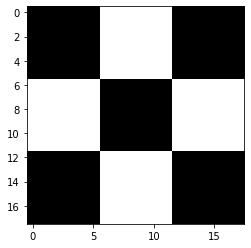

In [2]:
# Read image as gray scale.
cb_img = cv2.imread("/content/drive/MyDrive/Python projects/OpenCV/SangramCV/Basic_image_manipulation/checkerboard_18x18.png", 0)

#Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap='gray')
print(cb_img)

## Accessing Individual Pixels

Let us see how to access a pixel in the image.
For accessing any pixel in a numpy matrix, you have to use matrix notation such as matrix[r,c], where the r is the row number and c is the column number. Also note that the matrix is 0-indexed.

For example, if you want to access the first pixel, you need to specify matrix[0,0]. Let us see with some examples. we will print one black pixel from top-left and onr white pixel from top-center.

In [4]:
# print the first pixel of the first black box
print(cb_img[0, 0])
#Print the first white pixel to the right of the first black box.
print(cb_img[0, 6])

0
255


##MOdifying Image Pixels

We can modify the intensity values of pixels in the same manner as described above.

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 250 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

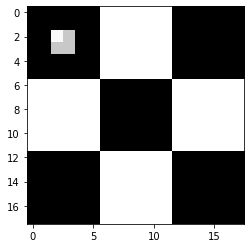

In [13]:
cb_img_copy = cb_img.copy()
cb_img_copy[2,2] = 250
cb_img_copy[2,3] = 200
cb_img_copy[3, 2] = 200
cb_img_copy[3, 3] = 200

#Same as above
# cb_img_copy[2:3, 2:3] = 200

plt.imshow(cb_img_copy, cmap='gray')
print(cb_img_copy)


##Cropping images
Cropping an image is simply achieved by selecting a specific (pixel) region of the image.

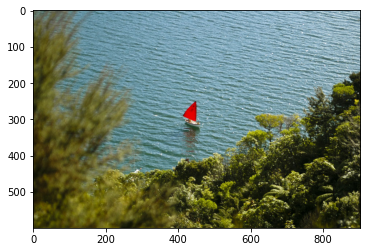

In [21]:
img_NZ_bgr = cv2.imread("/content/drive/MyDrive/Python projects/OpenCV/SangramCV/Basic_image_manipulation/New_Zealand_Boat.jpg", cv2.IMREAD_COLOR)
img_NZ_bgr = img_NZ_bgr[:,:,::-1]
plt.imshow(img_NZ_bgr)

##Crop out the middle region of the image

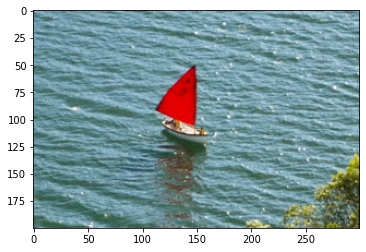

In [29]:
cropped_region = img_NZ_bgr[200:400, 300:600]
plt.imshow(cropped_region)

##Resizing Images
The function ***`resize`*** resizes the image ***src*** down to or up to the specified size. The size and type are derived from the **src**, **dsize**, **fx**, and **fy**.

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```python
dst = resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )
```
`dst` : output image; it has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.

The function hass **2 required arguments**:

1. `src`: input image
2. `dsize`: output image size

Optional arguments that are often used include:

1 `fx`: Scale factor along the horizontal axis; when it equals 0, it is computed as (double)dsize.width/src.cols
2. `fy`: Scale factor along the vertical axis; when it equals 0, it is computed as (double)dsize.height/src.rows

The output image has the size `dsize` (when it is non-zero) or the size computed from `src.size()`, `fx`, and `fy`; the type of dst is the same as of src.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`resize():`** https://docs.opencv.org/4.5.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d


#Method 1: Specifying scaling factor using fx and fy

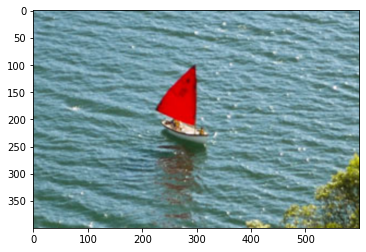

In [37]:
resized_cropped_img = cv2.resize(cropped_region,None, fx=2, fy=2)
plt.imshow(resized_cropped_img)

#Method 2: Specifying exact size of the output image

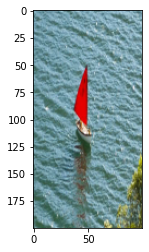

In [39]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

#Resize background image to see size as logo image
resized_cropped = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped)

#Resize while maintaining aspect ratio

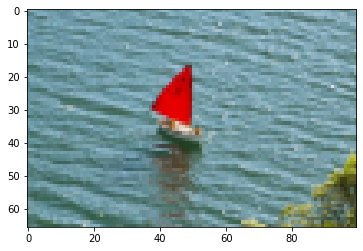

In [40]:
# Method 2: Using 'dsize'
desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

#Resize image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

##Let's actually show the (cropped) resized image.

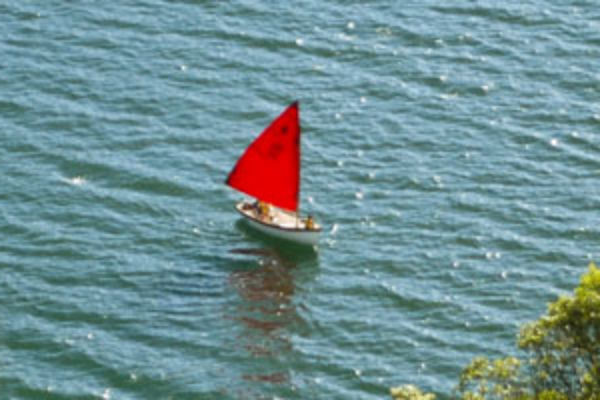

In [42]:
# Swap channel order
resized_cropped_region_2x = resized_cropped_img[:,:,::-1]

#Save resized image to disk
cv2.imwrite("resized_cropped_region_2x.png", resized_cropped_region_2x)

#Display the cropped and resized image
Image(filename='resized_cropped_region_2x.png')

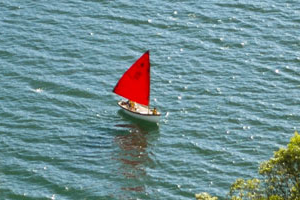

In [43]:
# Swap channel order
cropped_region = cropped_region[:,:,::-1]

#Save cropped 'region'
cv2.imwrite("cropped_region.png", cropped_region)

#Display the cropped and resized image
Image(filename='cropped_region.png')

# Flipping Images


The function **`flip`** flips the array in one of three different ways (row and column indices are 0-based):

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = cv.flip( src, flipCode )
```

`dst`: output array of the same size and type as src.

The function has **2 required arguments**:
    
1. `src`:	input image
2. `flipCode`: a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.


### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`flip:`** https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441

Text(0.5, 1.0, 'Orignal')

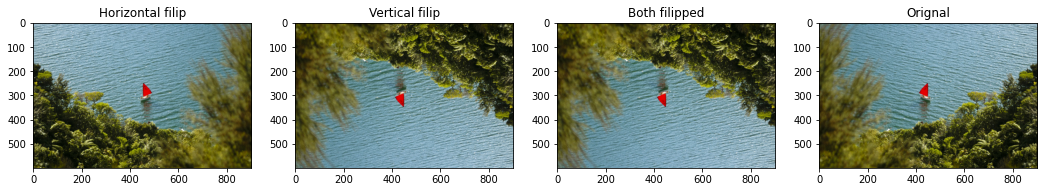

In [52]:
img_NZ_rgb_flipped_horz = cv2.flip(img_NZ_bgr, 1)
img_NZ_rgb_flipped_vert = cv2.flip(img_NZ_bgr, 0)
img_NZ_rgb_flipped_both = cv2.flip(img_NZ_bgr, -1)

# Show the images
plt.figure(figsize=[18,6])
plt.subplot(141);plt.imshow(img_NZ_rgb_flipped_horz);plt.title("Horizontal filip")
plt.subplot(142);plt.imshow(img_NZ_rgb_flipped_vert);plt.title("Vertical filip")
plt.subplot(143);plt.imshow(img_NZ_rgb_flipped_vert);plt.title("Both filipped")
plt.subplot(144);plt.imshow(img_NZ_bgr);plt.title("Orignal")

#Thank You